In [320]:
!pip install matplotlib


In [321]:
!pip install xgboost

In [322]:
!pip install scikit-learn

In [323]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  

In [325]:
df = pd.read_csv('ott_churn_cleaned.csv')
df.head()
df = df.drop(columns = ['customer_id'])

In [326]:
df.head(10)

,signup_month,tenure_months,plan_type,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,auto_renew,genre_pref,has_kids_profile,device_type,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,payment_method,is_churned
0,Feb,18.0,Basic,599.0,5.0,54.0,2.0,27.0,No,Action,Yes,Smart TV,5.0,1.0,40.9,51.0,UPI,1
1,NaN,3.0,Basic,599.0,4.0,10.9,4.0,13.0,No,Comedy,No,Smart TV,2.0,1.0,60.9,46.0,UPI,1
2,Feb,20.0,Standard,199.0,2.0,31.3,1.0,21.0,Yes,Documentary,No,Tablet,4.0,1.0,58.9,30.0,UPI,1
3,Jul,35.0,Basic,599.0,5.0,34.1,3.0,25.0,Yes,Comedy,No,Laptop,5.0,0.0,NaN,36.0,UPI,1
4,Feb,30.0,Premium,399.0,3.0,44.5,9.0,0.0,No,Documentary,No,Mobile,4.0,1.0,31.9,9.0,UPI,0
5,Feb,3.0,Basic,199.0,5.0,31.6,0.0,5.0,Yes,Horror,Yes,Smart TV,4.0,1.0,72.0,30.0,UPI,1
6,Jan,15.0,Basic,NaN,5.0,63.7,1.0,22.0,Yes,Horror,Yes,Laptop,2.0,0.0,51.7,13.0,Net Banking,1
7,Apr,18.0,Basic,NaN,3.0,34.7,9.0,4.0,No,Action,Yes,Smart TV,2.0,0.0,44.1,23.0,Net Banking,0
8,Jun,35.0,Basic,399.0,5.0,30.4,1.0,8.0,Yes,Comedy,No,Mobile,2.0,1.0,31.1,12.0,Net Banking,0
9,Jul,10.0,Premium,399.0,1.0,38.4,1.0,6.0,Yes,Documentary,No,Smart TV,NaN,1.0,38.1,56.0,Net Banking,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   signup_month              7994 non-null   object 
 1   tenure_months             7975 non-null   float64
 2   plan_type                 7976 non-null   object 
 3   monthly_fee               7979 non-null   float64
 4   num_profiles              7970 non-null   float64
 5   watch_hours_last_month    7985 non-null   float64
 6   binge_days_last_month     8001 non-null   float64
 7   last_login_days_ago       7973 non-null   float64
 8   auto_renew                7993 non-null   object 
 9   genre_pref                7996 non-null   object 
 10  has_kids_profile          7982 non-null   object 
 11  device_type               7975 non-null   object 
 12  num_devices_used          7968 non-null   float64
 13  support_tickets_last_3mo  7983 non-null   float64
 14  avg_watc

In [328]:
df['tenure_months'] = pd.to_numeric(df['tenure_months'], errors='coerce')
df['tenure_bin'] = pd.cut(df['tenure_months'], bins=[0, 3, 6, 12, 24, 100], labels=['<3m', '3-6m', '6-12m', '1-2y', '2y+'])
print(df.columns)

Index(['signup_month', 'tenure_months', 'plan_type', 'monthly_fee',
       'num_profiles', 'watch_hours_last_month', 'binge_days_last_month',
       'last_login_days_ago', 'auto_renew', 'genre_pref', 'has_kids_profile',
       'device_type', 'num_devices_used', 'support_tickets_last_3mo',
       'avg_watch_session_min', 'ads_watched_last_month', 'payment_method',
       'is_churned', 'tenure_bin'],
      dtype='object')


In [329]:

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)



df.isnull().sum()




C:\Users\tjsss\AppData\Local\Temp\ipykernel_30000\58673422.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


tenure_months                   0
monthly_fee                     0
num_profiles                    0
watch_hours_last_month          0
binge_days_last_month           0
last_login_days_ago             0
num_devices_used                0
support_tickets_last_3mo        0
avg_watch_session_min           0
ads_watched_last_month          0
is_churned                      0
tenure_bin                    165
signup_month_Feb                0
signup_month_Jan                0
signup_month_Jul                0
signup_month_Jun                0
signup_month_Mar                0
signup_month_May                0
plan_type_Premium               0
plan_type_Standard              0
auto_renew_Yes                  0
genre_pref_Comedy               0
genre_pref_Documentary          0
genre_pref_Drama                0
genre_pref_Horror               0
genre_pref_Sci-Fi               0
has_kids_profile_Yes            0
device_type_Mobile              0
device_type_Smart TV            0
device_type_Ta

In [330]:
df.isnull().sum()


tenure_months                   0
monthly_fee                     0
num_profiles                    0
watch_hours_last_month          0
binge_days_last_month           0
last_login_days_ago             0
num_devices_used                0
support_tickets_last_3mo        0
avg_watch_session_min           0
ads_watched_last_month          0
is_churned                      0
tenure_bin                    165
signup_month_Feb                0
signup_month_Jan                0
signup_month_Jul                0
signup_month_Jun                0
signup_month_Mar                0
signup_month_May                0
plan_type_Premium               0
plan_type_Standard              0
auto_renew_Yes                  0
genre_pref_Comedy               0
genre_pref_Documentary          0
genre_pref_Drama                0
genre_pref_Horror               0
genre_pref_Sci-Fi               0
has_kids_profile_Yes            0
device_type_Mobile              0
device_type_Smart TV            0
device_type_Ta

In [331]:
df.describe()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,is_churned
count,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000
mean,18.010408,397.696579,2.996361,34.794051,4.435571,14.812618,3.013178,0.687962,55.380247,29.337004,0.573219
std,9.997445,162.479575,1.402125,14.775227,2.860929,8.772087,1.396801,0.832421,19.682862,17.090191,0.494640
min,1.000000,199.000000,1.000000,-0.100000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,10.000000,199.000000,2.000000,24.800000,2.000000,7.000000,2.000000,0.000000,42.400000,15.000000,0.000000
50%,18.000000,399.000000,3.000000,34.794051,4.000000,14.812618,3.000000,0.687962,55.380247,29.337004,1.000000
75%,26.000000,599.000000,4.000000,44.600000,7.000000,22.000000,4.000000,1.000000,68.600000,44.000000,1.000000
max,35.000000,599.000000,5.000000,92.500000,9.000000,30.000000,5.000000,6.000000,124.900000,59.000000,1.000000


In [332]:
df.head()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,18.0,599.0,5.0,54.0,2.0,27.0,5.0,1.0,40.900000,51.0,...,False,False,False,True,False,True,False,False,False,True
1,3.0,599.0,4.0,10.9,4.0,13.0,2.0,1.0,60.900000,46.0,...,False,False,False,False,False,True,False,False,False,True
2,20.0,199.0,2.0,31.3,1.0,21.0,4.0,1.0,58.900000,30.0,...,False,False,False,False,False,False,True,False,False,True
3,35.0,599.0,5.0,34.1,3.0,25.0,5.0,0.0,55.380247,36.0,...,False,False,False,False,False,False,False,False,False,True
4,30.0,399.0,3.0,44.5,9.0,0.0,4.0,1.0,31.900000,9.0,...,False,False,False,False,True,False,False,False,False,True


In [334]:
corr_matrix = df.corr()
corr_w_churned = corr_matrix['is_churned'].sort_values(ascending=False)
print(corr_w_churned)


ValueError: could not convert string to float: '1-2y'

In [ ]:

df.head()

,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,is_churned,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,599.0,5.0,54.0,2.0,27.0,5.0,1.0,40.900000,51.0,1.0,...,False,False,False,True,False,True,False,False,False,True
1,599.0,4.0,10.9,4.0,13.0,2.0,1.0,60.900000,46.0,1.0,...,False,False,False,False,False,True,False,False,False,True
2,199.0,2.0,31.3,1.0,21.0,4.0,1.0,58.900000,30.0,1.0,...,False,False,False,False,False,False,True,False,False,True
3,599.0,5.0,34.1,3.0,25.0,5.0,0.0,55.380853,36.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,399.0,3.0,44.5,9.0,0.0,4.0,1.0,31.900000,9.0,0.0,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
df.head(20)



,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,is_churned,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,599.000000,5.0,54.0,2.000000,27.0,5.000000,1.0,40.900000,51.0,1.0,...,False,False,False,True,False,True,False,False,False,True
1,599.000000,4.0,10.9,4.000000,13.0,2.000000,1.0,60.900000,46.0,1.0,...,False,False,False,False,False,True,False,False,False,True
2,199.000000,2.0,31.3,1.000000,21.0,4.000000,1.0,58.900000,30.0,1.0,...,False,False,False,False,False,False,True,False,False,True
3,599.000000,5.0,34.1,3.000000,25.0,5.000000,0.0,55.380853,36.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,399.000000,3.0,44.5,9.000000,0.0,4.000000,1.0,31.900000,9.0,0.0,...,False,False,False,False,True,False,False,False,False,True
5,199.000000,5.0,31.6,0.000000,5.0,4.000000,1.0,72.000000,30.0,1.0,...,False,True,False,True,False,True,False,False,False,True
6,397.671679,5.0,63.7,1.000000,22.0,2.000000,0.0,51.700000,13.0,1.0,...,False,True,False,True,False,False,False,False,True,False
7,397.671679,3.0,34.7,9.000000,4.0,2.000000,0.0,44.100000,23.0,0.0,...,False,False,False,True,False,True,False,False,True,False
8,399.000000,5.0,30.4,1.000000,8.0,2.000000,1.0,31.100000,12.0,0.0,...,False,False,False,False,True,False,False,False,True,False
9,399.000000,1.0,38.4,1.000000,6.0,3.012925,1.0,38.100000,56.0,0.0,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
df.describe()
df['is_churned'] = df['is_churned'].replace(2, 1)

In [ ]:
df.groupby('plan_type')['is_churned'].mean()



KeyError: 'plan_type'

In [ ]:
df.groupby('auto_renew')['is_churned'].mean()


auto_renew
No     0.572377
Yes    0.574960
Name: is_churned, dtype: float64

In [ ]:
df.groupby('num_devices_used')['is_churned'].mean()

num_devices_used
1.0    0.584341
2.0    0.559010
3.0    0.578915
4.0    0.562152
5.0    0.583021
Name: is_churned, dtype: float64

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

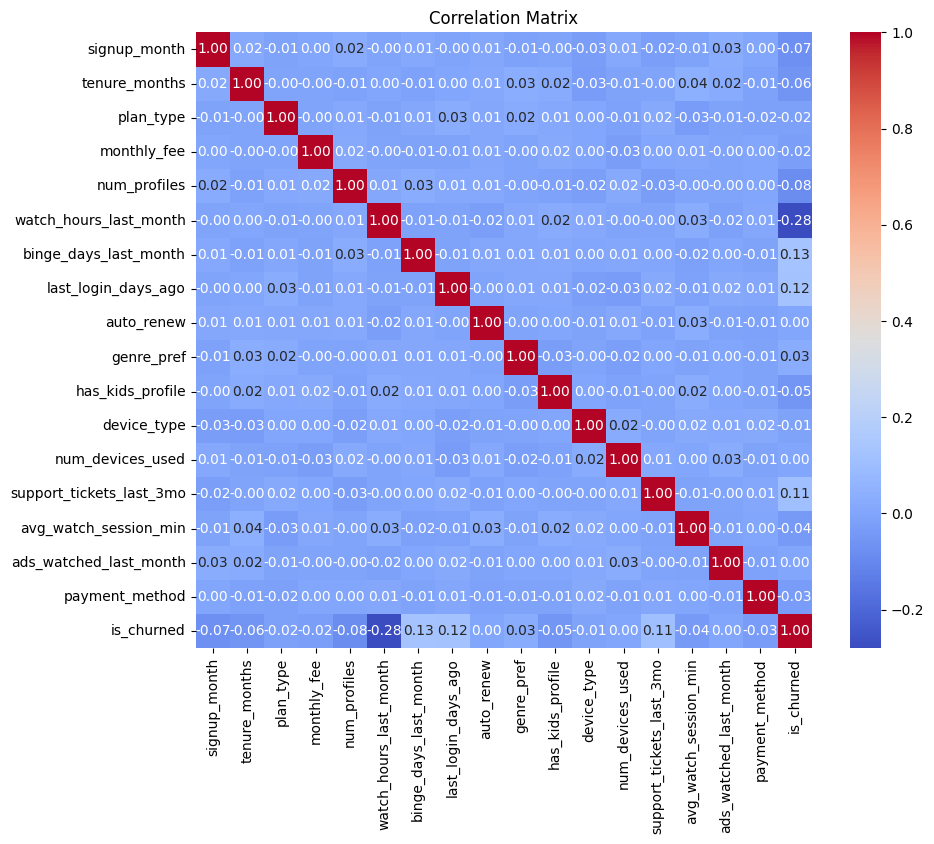

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()
# df = df.drop(columns = ['auto_renew', 'num_devices_used', 'ads_watched_last_month', 'device_type'])



# X = df.drop(columns=['is_churned'])
# Y = df['is_churned']


,signup_month,tenure_months,plan_type,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,auto_renew,genre_pref,has_kids_profile,device_type,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,payment_method,is_churned
0,Feb,18,Basic,599.0,5.0,54.0,2.0,27.0,No,Action,Yes,Smart TV,5.0,1.0,40.9,51.0,UPI,1.0
1,NaN,3,Basic,599.0,4.0,10.9,4.0,13.0,No,Comedy,No,Smart TV,2.0,1.0,60.9,46.0,UPI,1.0
2,Feb,20,Standard,199.0,2.0,31.3,1.0,21.0,Yes,Documentary,No,Tablet,4.0,1.0,58.9,30.0,UPI,1.0
3,Jul,35,Basic,599.0,5.0,34.1,3.0,25.0,Yes,Comedy,No,Laptop,5.0,0.0,NaN,36.0,UPI,1.0
4,Feb,30,Premium,399.0,3.0,44.5,9.0,0.0,No,Documentary,No,Mobile,4.0,1.0,31.9,9.0,UPI,0.0
